# Understanding the BoreholeInterpreter object model

The BoreholeInterpreter object model consists of three main components: the Project object, the Borehole object, and the CPT object. To use these objects, you must import these classes first.

In [1]:
from classes import Project, Borehole, CPT

## Project object

The Project encapsulates all geotechnical points, i.e. Boreholes, CPTs, for that specific project/region. Once a Project is created, you can do various things with the points stored in that Project, such as collating all data into a Dataframe, drawing visual logs of the points, etc.

To create a Project, use the following command.

In [2]:
my_project = Project()

You can use the add() method to add various Borehole and CPT objects into this project. We'll get back to how this works in the next sections.

## Borehole object

To create a Borehole object, use the following command:

In [3]:
# Add a Borehole object with the label BH-1, located at X=234587.1, Y=9813673.2, and elevated at RL 48.3
my_bh = Borehole("BH-1", 234587.1, 9813673.2, 48.3)

A Borehole object can have multiple datasets associated with it, e.g. stratigraphy, sampling, groundwater level. For example, to set its stratigraphy:

In [4]:
# Each row in the stratigraphy dataset represents the following fields:
# 1) The top depth of the borehole segment
# 2) The bottom depth of the borehole segment
# 3) The soil type of the borehole segment
# 4) The detailed soil description of the borehole segment
# 5) The USCS of the borehole segment
my_bh.stratigraphy = [
    [0, 2, "FILL", "FILL; Fat Clay", "CH"],
    [2, 5, "FILL", "FILL; Sandy Clay", "SC"],
    [5, 6, "SAND", "Well-graded Sand, dry, subangular to angular, brown", "SW"],
    [6, 7, "", "Core loss", ""],
    [7, 10, "SAND", "Well-graded Sand, dry, subangular to angular, brown", "SW"],
    [9, None, "", "grades grey", ""],
    [10, 15, "GRAVEL", "Poorly-graded Gravel, dry, subangular to angular, grey", "GP"]
]

To set its sampling:

In [5]:
# Each row in the sampling dataset represents the following fields:
# 1) The top depth of the borehole segment
# 2) The bottom depth of the borehole segment
# 3) The recovery of the borehole segment
# 4) The sampling type, e.g. SPT, UDS, VST, of the borehole segment
# 5) A text detailing the results of the sampling/field test
# 6) The SPT-N value, either in numeric, e.g. 6, or text form, e.g. ">50"
# 7) The field undrained shear strength tested by Pocket Penetrometer
# 8) The field undrained shear strength tested by Torvane
# 9) The field peak undrained shear strength tested by Vane Shear Test
# 10) The field residual undrained shear strength tested by Vane Shear Test
my_bh.sampling = [
    [0.5, 1.0, 0.3, "SPT", "(5,4,2) N=6", 6],
    [1.5, 2.0, 0.5, "UDS", "PP=200, 300, 250 kPa; TV: 100 kPa", None, 200, 250],
    [2.5, 3.0, 0.5, "VST", "Vs=300 kPa, Vr=50 kPa", None, None, None, 300, 50],
    [3.5, 4.0, 0.5, "SPT", "(35,48,2/10) N>50", ">50"]
]

To add a borehole object into your project, simply use the Project.add() method:

In [6]:
my_project.add(my_bh)

## The CPT object

To create a CPT object, use the following command:

In [7]:
# Add a CPT object with the label CPT-1, located at X=234586.3, Y=9813667.9, and elevated at RL 51.2
my_cpt = CPT("CPT-1", 234586.3, 9813667.9, 51.2)

To set the raw drilling data, i.e. cone penetration (qc), sleeve friction (fs), porewater pressure behind tip (u2), use the following command:

In [8]:
# Each row in the raw drilling data represents:
# 1) Depth of probe testing
# 2) The cone penetration, qc, at depth
# 3) The sleeve friction, fs, at depth
# 4) The porewater pressure behind tip, u2, at depth
my_cpt.raw_data = [
    [0.05, 1.44, 35.595, -4.688],
    [0.1, 1.805, 47.25, 18.751],
    [0.15, 1.486, 47.04, -49.898],
    [0.2, 1.266, 36.645, -45.387],
    [0.25, 1.103, 27.405, -46.27],
    [0.3, 1.003, 16.065, -42.837],
    [0.35, 1.042, 11.025, -44.603],
    [0.4, 0.994, 10.08, -35.09],
    [0.45, 1.115, 12.81, -32.148]
]

To start interpreting this CPT data, you can use the calculate() method:

In [9]:
my_cpt.calculate(
    area_ratio=0.85, 
    unit_weight=16, 
    gwl_depth=0, 
    soil_classification_method='Eslami Fellenius'
)

To get a quick look at this calculated data:

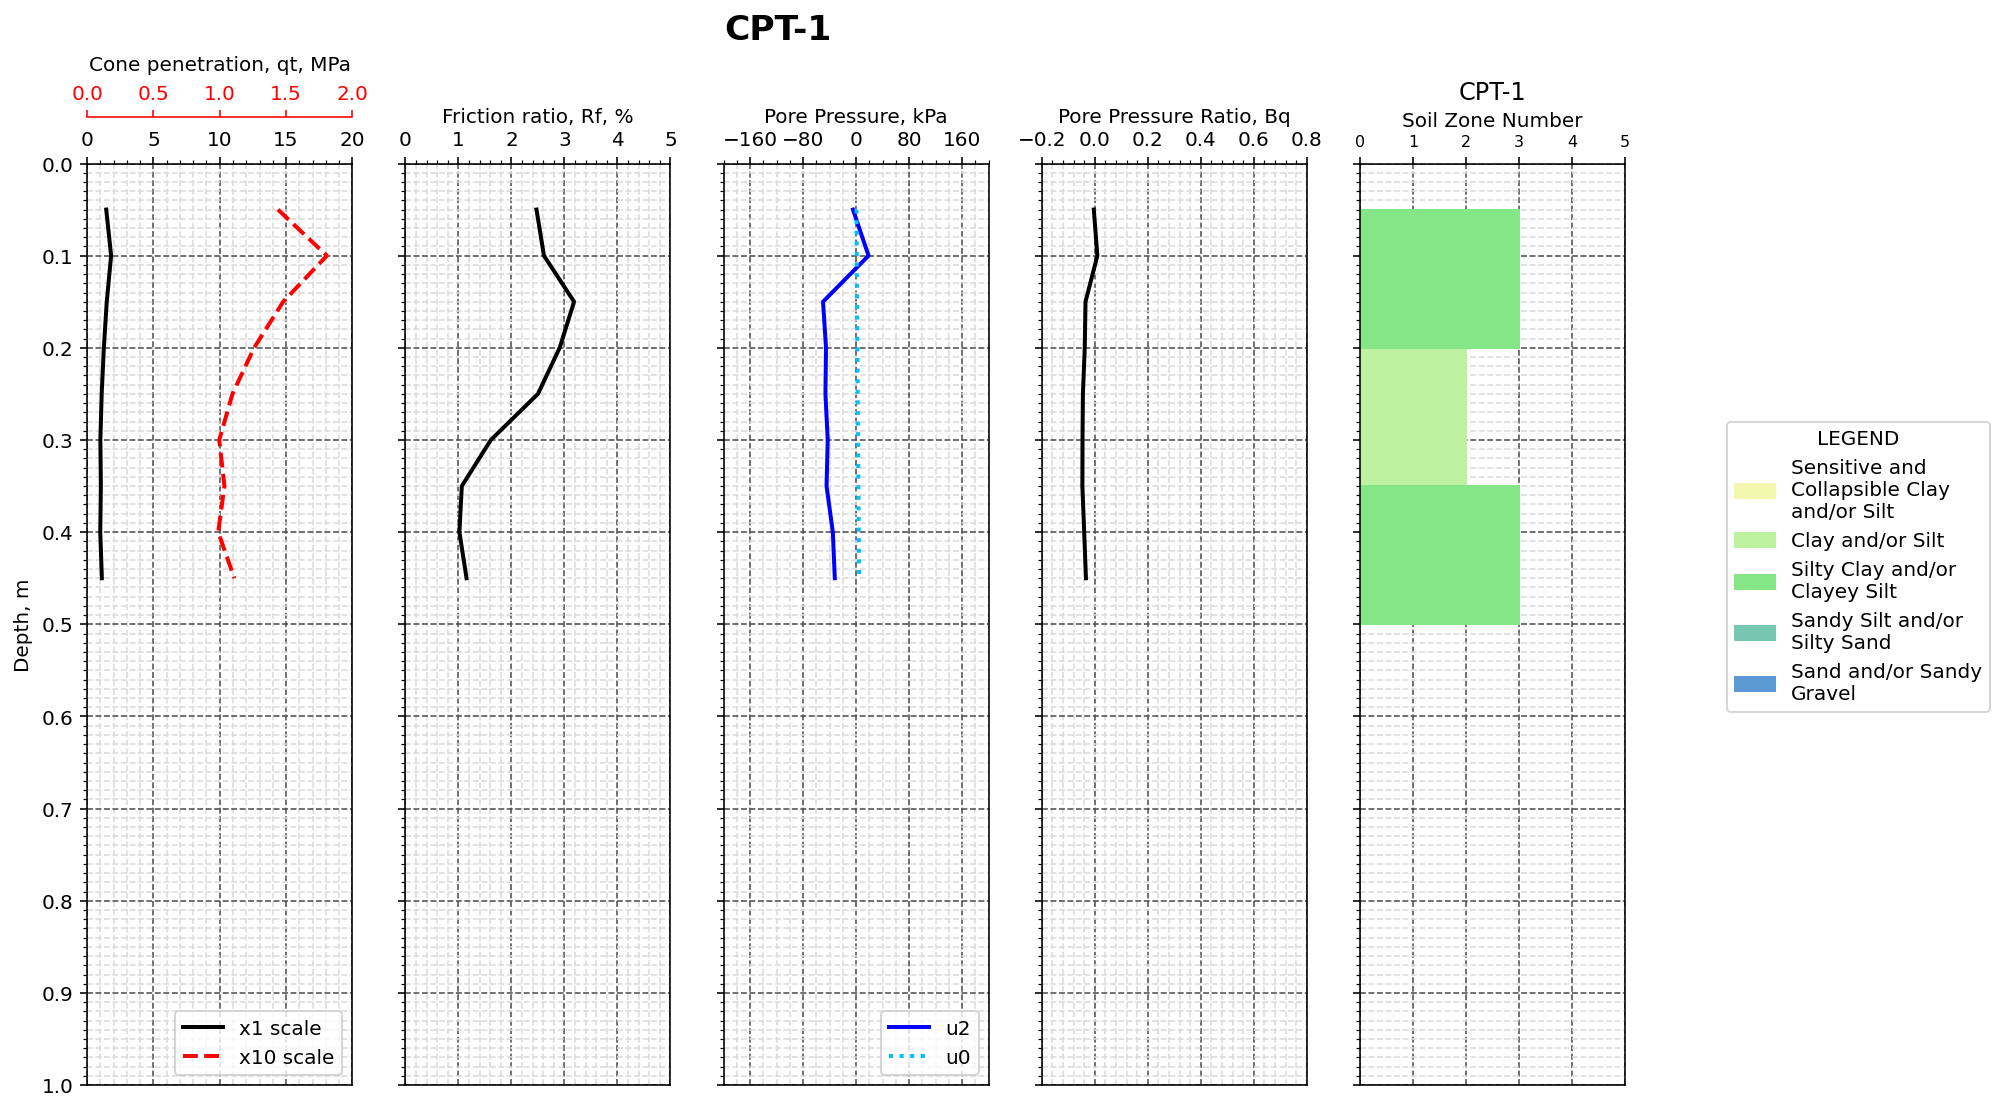

In [10]:
img = my_cpt.plot()

To add a CPT object into your project, simply use the Project.add() method:

In [11]:
my_project.add(my_cpt)

## Summarizing the Project

Once points have been added to the Project, you can use the Project.get_list_of_all_points() method to get a quick summary of the points added to the Project.

In [12]:
my_project.get_list_of_all_points()

,Point ID,Test Type,X,Y,Elevation,Hole Depth
0,BH-1,Borehole,234587.1,9813673.2,48.3,15.00
1,CPT-1,CPT,234586.3,9813667.9,51.2,0.45


Use the following command to plot the location of geotechnical test points.

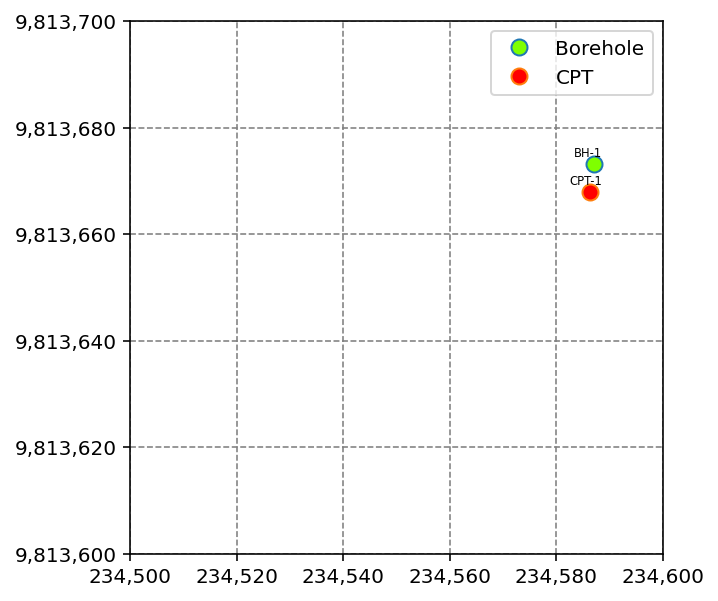

In [13]:
site_plan = my_project.plot_location()

## Iterating through the points in a Project

You can iterate through points in a Project by using the following syntax:

In [14]:
for point in my_project:
    print(point)
    print("\n")

Borehole
Point ID :	BH-1
X:		234,587.1
Y:		9,813,673.2
Elevation:	48.3


CPT
Point ID :	CPT-1
X:		234,586.3
Y:		9,813,667.9
Elevation:	51.2




## Selecting a point

You can select a point by using the Project.get() method.

In [15]:
get_point = my_project.get("BH-1")

print(get_point)

Borehole
Point ID :	BH-1
X:		234,587.1
Y:		9,813,673.2
Elevation:	48.3


You can then perform any operation on this selected point object.

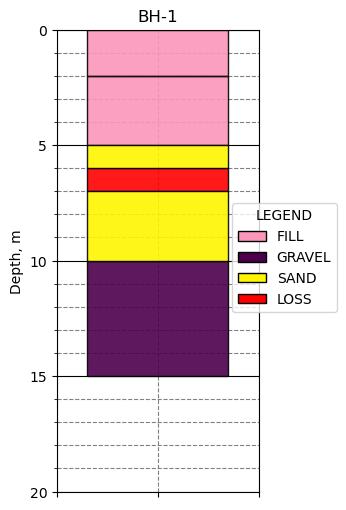

In [16]:
img = get_point.plot()